In [1]:
%matplotlib inline
from lstm_siamese import dir_dictionary
import h5py
import numpy as np
import matplotlib.pyplot as plt
import os.path

result root is at /Users/yimengzh/Research/lstm-siamese/results


In [2]:
# collect all stats
def collect_stat_one_file(filename):
    mini_batch_fraction = np.linspace(0, 1, 112, endpoint=False)
    
    online_error = []
    online_loss = []
    test_error = []
    test_loss = []
    train_error = []
    train_loss = []
    
    with h5py.File(stat_this, 'r') as f:
        num_epoch = len(f.keys())
        assert set(f.keys()) == set([str(i) for i in range(num_epoch)])
        for i in range(num_epoch):
            grp_this = f[str(i)]
            error_per_batch = grp_this['error_per_batch'][...]
            loss_per_batch = grp_this['loss_per_batch'][...]
            assert error_per_batch.shape == loss_per_batch.shape == (112,)
            online_error.append(np.array([mini_batch_fraction + i, error_per_batch]).T)
            online_loss.append(np.array([mini_batch_fraction + i, loss_per_batch]).T)
            test_error.append([i, grp_this['test/timit_test'].attrs['mean_error_rate']])
            test_loss.append([i, grp_this['test/timit_test'].attrs['mean_loss']])
            train_error.append([i, grp_this['test/timit_train'].attrs['mean_error_rate']])
            train_loss.append([i, grp_this['test/timit_train'].attrs['mean_loss']])
    
    online_error = np.concatenate(online_error)
    online_loss = np.concatenate(online_loss)
    test_error = np.asarray(test_error)
    test_loss = np.asarray(test_loss)
    train_error = np.asarray(train_error)
    train_loss = np.asarray(train_loss)
    return online_loss, online_error, test_error, test_loss, train_error, train_loss
        
        

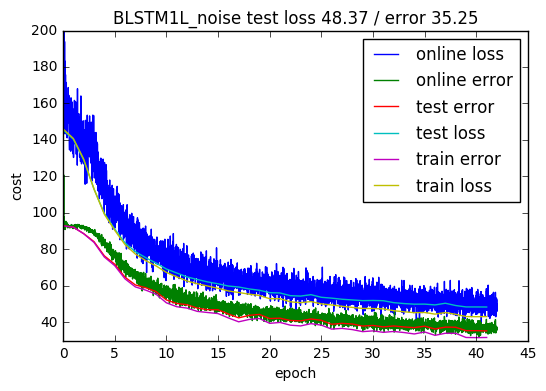

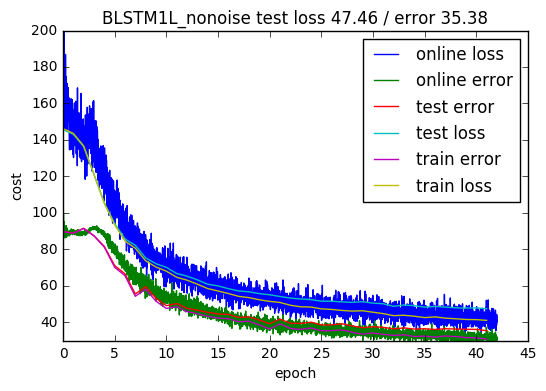

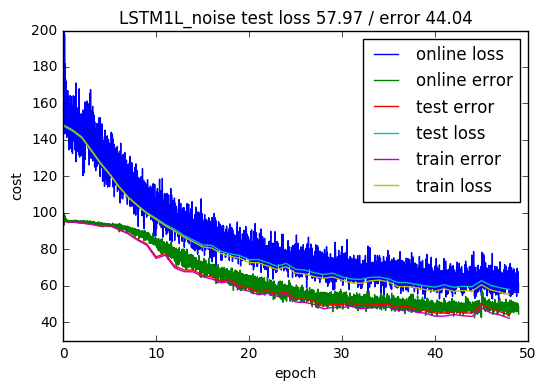

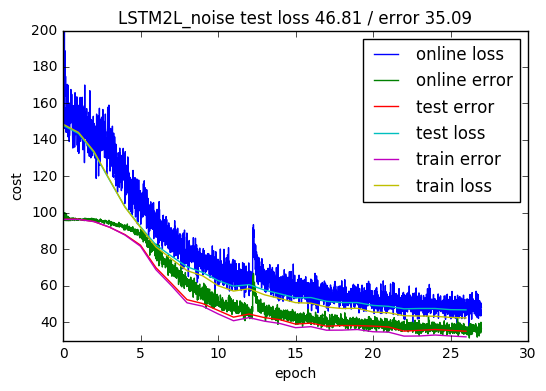

In [3]:
model_list = ['BLSTM1L_default_noise', 'BLSTM1L_default_nonoise', 'LSTM1L_default_noise', 'LSTM2L_default_noise']
title_list = ['BLSTM1L_noise', 'BLSTM1L_nonoise', 'LSTM1L_noise', 'LSTM2L_noise']

for model, title_this in zip(model_list, title_list):
    # get the location of hdf5 file
    stat_this = os.path.join(dir_dictionary['models'], 'TIMIT_train_' + model, 'stats.hdf5')
    
    online_loss, online_error, test_error, test_loss, train_error, train_loss = collect_stat_one_file(stat_this)
    
    plt.close('all')
    fig = plt.figure(figsize=(6,4))
    plt.plot(online_loss[:,0], online_loss[:,1], label='online loss')
    plt.plot(online_error[:,0], online_error[:,1]*100, label='online error')
    
    plt.plot(test_error[:,0], test_error[:,1]*100, label='test error')
    plt.plot(test_loss[:,0], test_loss[:,1], label='test loss')
    
    plt.plot(train_error[:,0], train_error[:,1]*100, label='train error')
    plt.plot(train_loss[:,0], train_loss[:,1], label='train loss')
    
    plt.ylim(30,200)
    plt.title(title_this + ' test loss {:.2f} / error {:.2f}'.format(test_loss[:,1].min(),
                                                               test_error[:,1].min()*100))
    plt.xlabel('epoch')
    plt.ylabel('cost')
    plt.legend()
    fig.savefig(model+'.pdf', dpi=300)
    plt.show()
    